In [1]:
#Question 1
!pip install selenium

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [3]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.amazon.in/") #To Connect with the Website

In [4]:
product=driver.find_element(By.XPATH, "/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input")
user_inp=input('Enter the product you want to search: ')
product.send_keys(user_inp)
    

Enter the product you want to search: guitar


In [5]:
search=driver.find_element(By.XPATH,"/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span")
search.click()

In [ ]:
#Question 2
#In the above question, now scrape the following details of each product listed in first 3 pages of your 
#search results and save it in a data frame and csv. In case if any product has less than 3 pages in search 
#results then scrape all the products available under that product name. Details to be scraped are: "Brand 
#Name", "Name of the Product", "Price", "Return/Exchange", "Expected Delivery", "Availability" and 
#“Product URL”. In case, if any of the details are missing for any of the product then replace it by “-“.

In [6]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [7]:
guitar_url=[]
start=0
end=3
for page in range(start,end):
    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        guitar_url.append(i.get_attribute('href'))
    


In [11]:
Brand=[]
Nameofpd=[]
price=[]
Return=[]
Del=[]
avail=[]
url=[]
for i in guitar_url:
    driver.get(i)
    brand=driver.find_elements(By.XPATH,'//span[@class="a-size-base po-break-word"]')
    for i in brand:
        Brand.append(i.text)
        
Brand

['Kadence',
 'Brown',
 'Wood',
 'Rosewood',
 'Rosewood',
 'VAULT',
 'Natural',
 'Linden',
 'Linden',
 'Linden',
 'Generic',
 'CREAM',
 'Ebony,Linden,Wood',
 'Wood',
 'Wood',
 'Kadence',
 'Black Spruce Wood',
 'Spruce,Rosewood',
 'Spruce',
 'Wood',
 'JUAREZ',
 'Black',
 'Wood,Linden,Ebony',
 'Wood',
 'Wood, Basswood',
 'Intern',
 'Black',
 'Wood,Linden,Ebony',
 'Linden',
 'Linden Wood',
 'YAMAHA',
 'Natural',
 'Rose',
 'Rosewood',
 'Rosewood',
 'Fender',
 'Black',
 'Basswood',
 'Walnut',
 'Mahogany Wood',
 'YAMAHA',
 'Natural',
 'Mahogany',
 'Wood',
 'Mahogany',
 'HOVNER',
 'Black',
 'Wood',
 'Rosewood',
 'Rosewood',
 'Kadence',
 'Natural',
 'Spruce',
 'Rosewood',
 'Rosewood',
 'Intern',
 'Black',
 'Wood',
 'Wood',
 'Wood',
 'JUAREZ',
 'Natural',
 'Wood,Linden,Ebony',
 'Wood',
 'Blackwood',
 'Kadence',
 'Black',
 'Wood',
 'Rosewood',
 'Rosewood',
 'JUAREZ',
 'Black',
 'Wood,Linden,Ebony',
 'Wood;Linden',
 'Alloy Steel, Wood, Basswood',
 'HOVNER',
 'Black',
 'Wood',
 'Rosewood',
 'Rosewo

In [15]:
start=0
end=1
for i in guitar_url:
    driver.get(i)
    namepd=driver.find_elements(By.XPATH, '//span[@class="a-size-large product-title-word-break"]')
    try:
        for i in namepd:
            Nameofpd.append(i.text)
    except NoSuchElementException:
        Nameofpd.append('-')
    cost=driver.find_elements(By.XPATH, '//span[@class="a-price-whole"]')
    try:
        for i in cost:
            price.append(i.text)
    except NoSuchElementException :
        price.append('-')
    ret_urn=driver.find_elements(By.XPATH, '//a[@class="a-size-small a-link-normal a-text-normal"]')
    try:
        for i in ret_urn:
            Return.append(i.text)
    except NoSuchElementException:
        Return.append('-')
    delivery=driver.find_elements(By.ID, 'DEXUnifiedCXPDM')
    try:
        for i in delivery:
            Del.append(i.text)
    except  NoSuchElementException:
        Del.append('-')
    
nextButton=driver.find_element(By.XPATH,"/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[25]/div/div/span/span[3]")
nextButton.click()
time.sleep(4)

In [16]:
print(len(Brand), len(Nameofpd), len(price), len(Return), len(Del), len(guitar_url))

975 198 1335 765 0 198


In [17]:
bpd=Brand[0:195]
npd=Nameofpd[0:195]
ppd=price[0:195]
rpd=Return[0:195]
gpd=guitar_url[0:195]
import pandas as pd
guitar=pd.DataFrame({'Brand':bpd, 'Name of the product': npd, 'Price of the Product': ppd, 'Return/Exchange': rpd, 'Product Url':gpd})
guitar

,Brand,Name of the product,Price of the Product,Return/Exchange,Product Url
0,Kadence,Kadence Frontier guitar with Online Guitar lea...,"4,949",Free Delivery,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
1,Brown,Vault DA20 Dreadnought Acoustic Guitar With Gi...,,Pay on Delivery,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
2,Wood,THE MUSIC WORLD - ACOUSTIC GUITAR F310,,7 days Replacement,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
3,Rosewood,Kadence Slowhand Premium Jumbo Semi Acoustic G...,,Amazon Delivered,https://www.amazon.in/sspa/click?ie=UTF8&spc=M...
4,Rosewood,"Juârez Acoustic Guitar, 38 Inch Cutaway, 038C ...",,Free Delivery,https://www.amazon.in/Juarez-Acoustic-Cutaway-...
...,...,...,...,...,...
190,JUAREZ,Fender dreadnought Squier Acoustic Guitar Drea...,,7 days Replacement,https://www.amazon.in/Fender-SA-150C-dreadnoug...
191,Black,Fender dreadnought Squier Acoustic Guitar Drea...,,Amazon Delivered,https://www.amazon.in/Fender-SA-150C-dreadnoug...
192,"Wood,Linden,Ebony","Walden, Acoustic Guitar, Orchestra, with Bag -...",,Free Delivery,https://www.amazon.in/Walden-Acoustic-Orchestr...
193,"Linden, Wood",JUAREZ Arpéggio 104.14 cm (41 Inch) Semi-Acous...,"7,919",Pay on Delivery,https://www.amazon.in/JUAREZ-Arp%C3%A9ggio-Sem...


In [ ]:
guitar.to_csv('File 1.csv')

In [18]:
#Question 3
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://images.google.com/")

In [20]:
fruits=[]


In [22]:
image=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
image.send_keys('fruits')
srh=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
srh.click()
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
fresh= driver.find_elements(By.XPATH,"/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]/a[1]/div[1]/img")
for i in fresh:
    fruits.append(i.get_attribute('src'))

fruits[0:10]

In [24]:
image=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
image.send_keys('cars')
srh=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
srh.click()
Cars=[]
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
Auto= driver.find_elements(By.XPATH,"/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]/a[1]/div[1]/img")
for i in Auto:
    Cars.append(i.get_attribute('src'))
    
Cars[0:10]

In [25]:
image=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
image.send_keys('Machine Learning')
srh=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button")
srh.click()
MAchinelearning=[]
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
ml= driver.find_elements(By.XPATH,"/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]/a[1]/div[1]/img")
for i in ml:
    MAchinelearning.append(i.get_attribute('src'))

MAchinelearning[0:10]

In [26]:
image=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
image.send_keys('Guitar')
srh=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
srh.click()
Guitar=[]
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
music= driver.find_elements(By.XPATH,"/html/body/div[2]/c-wiz/div[3]/div[1]/div/div/div/div/div[1]/div[1]/span/div[1]/div[1]/div[1]/a[1]/div[1]/img")
for i in music:
    Guitar.append(i.get_attribute('src'))
    
Guitar[0:10]

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]
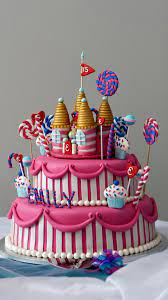
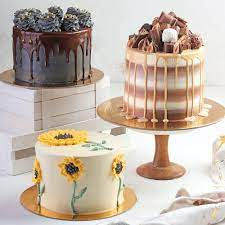
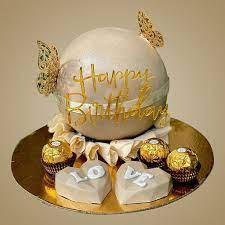
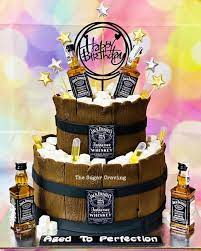
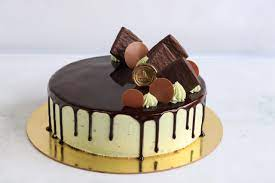
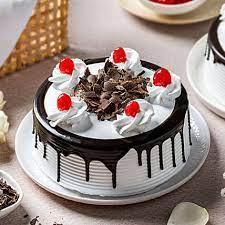
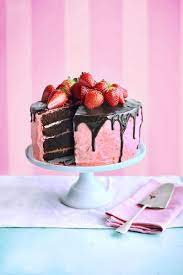
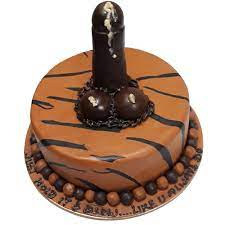
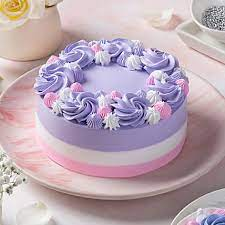
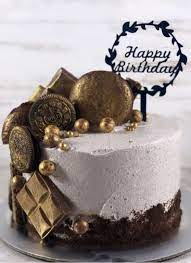
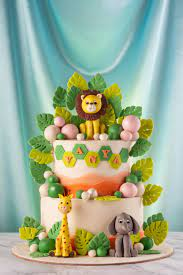
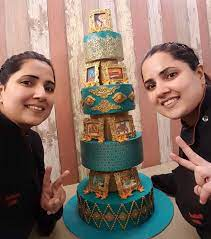
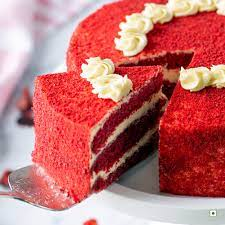
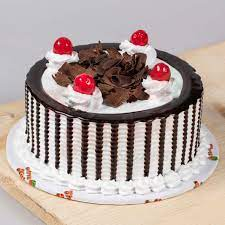
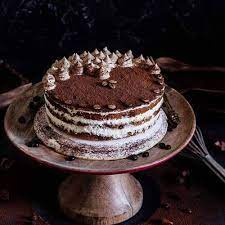
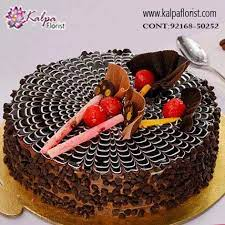
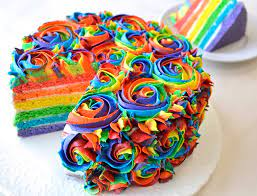
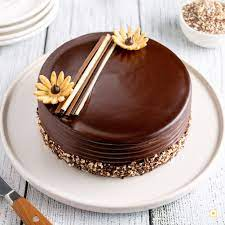
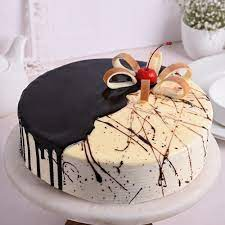
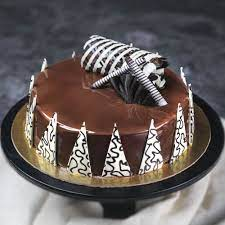

In [29]:
image=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input")
image.send_keys('Cakes')
srh=driver.find_element(By.XPATH,"/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button/div/span")
srh.click()
cake=[]
driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
sweet= driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in sweet:
    cake.append(i.get_attribute('src'))
    
cake[0:10]

In [30]:
import requests
from bs4 import BeautifulSoup
i=0
for i in range(len(cake)):
    if i>10:
        break
        response=requests.get(cake[i])
        file=open(r"F:\desktop"+str(i+m)+".jpg","wb")
        file.write(response.content)
        m=m+1

In [230]:
#Question 5
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.google.com/maps/@28.622848,77.1391488,12z")

In [231]:
loc=driver.find_element(By.ID,'searchboxinput')
loc.send_keys('Delhi')

In [232]:
searchloc=driver.find_element(By.ID, 'searchbox-searchbutton')
searchloc.click()

In [233]:
get_url = driver.current_url
print("The current url is:"+str(get_url))


The current url is:https://www.google.com/maps/place/Delhi/@28.6437954,76.813031,10z/data=!4m5!3m4!1s0x390cfd5b347eb62d:0x37205b715389640!8m2!3d28.7040592!4d77.1024902


In [228]:
import re

In [239]:
txt=get_url
x=re.findall("[-]?[\d]+[.][\d]*",txt)
x[0:2]

['28.6437954', '76.813031']

In [1]:
#Question 10 
#Write a python program to scrape a data for all available Hostels from https://www.hostelworld.com/ in 
#“London” location. You have to scrape hostel name, distance from city centre, ratings, total reviews, 
#overall reviews, privates from price, dorms from price, facilities and property description.

In [2]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [3]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.hostelworld.com/") 

In [17]:
loc=driver.find_element(By.XPATH, '/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[1]/div/div/div/input')
loc.send_keys("London, England")

In [19]:
go=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[4]/div/div[2]/div/div[5]/button')
go.click()

In [20]:
Name=[]
rating=[]
distance=[]
totalreview=[]
overall=[]
facilities=[]
private=[]
dorms=[]

In [30]:
hostel=driver.find_elements(By.XPATH, '//h2[@class="title title-6"]')
for i in hostel:
    Name.append(i.text)

rate=driver.find_elements(By.XPATH,'//div[@class="score orange big"]')
for i in rate:
    rating.append(i.text)

dis=driver.find_elements(By.XPATH, '//span[@class="description"]')
for i in dis:
    distance.append(i.text)
    
pvt=driver.find_elements(By.XPATH,'//div[@class="price title-5"]')
for i in pvt:
    private.append(i.text)
    
dor=driver.find_elements(By.XPATH, '//div[@class="price-col"]')
for i in dor:
    dorms.append(i.text)

In [32]:
print(len(Name), len(rating), len(distance), len(private), len(dorms))

30 58 60 90 120


In [34]:
nh=Name[0:30]
rh=rating[0:30]
lh=distance[0:30]
ph=private[0:30]
dh=dorms[0:30]
import pandas as pd
Hostel=pd.DataFrame({'Hostel Name': nh, 'Ratings': rh, 'Distance for the city center': lh, 'Private Cost':ph, 'Dorm Cost': dh})
Hostel

,Hostel Name,Ratings,Distance for the city center,Private Cost,Dorm Cost
0,NX London Hostel,7.9,Hostel - 6.1km from city centre,Rs8999.94 Rs6300,Privates From\nRs8999.94 Rs6300
1,Wombat's City Hostel London,8.9,Hostel - 3.6km from city centre,Rs1763.36 Rs1411,Dorms From\nRs1763.36 Rs1411
2,St Christopher's Village,8.0,Hostel - 1.8km from city centre,Rs17659.5 Rs14128,Privates From\nRs17659.5 Rs14128
3,Hostel One Notting Hill,9.4,Hostel - 5.5km from city centre,Rs3499.24 Rs2799,Dorms From\nRs3499.24 Rs2799
4,Pickwick Hall,8.6,Hostel - 2.3km from city centre,Rs1498.57 Rs1349,No Privates Available
5,Generator London,7.6,Hostel - 3km from city centre,Rs7815,Dorms From\nRs1498.57 Rs1349
6,Urbany Hostel London,9.2,Hostel - 5.4km from city centre,Rs2460,Privates From\nRs7815
7,Safestay London Elephant & Castle,7.4,Hostel - 1.7km from city centre,Rs6998,Dorms From\nRs2460
8,Smart Hyde Park Inn Hostel,7.4,Hostel - 5km from city centre,Rs7309,Privates From\nRs6998
9,Smart Russell Square Hostel,7.3,Hostel - 2.6km from city centre,Rs2025,No Dorms Available


In [35]:
#Question 8
#Write a python program to scrape the details for all billionaires from www.forbes.com. Details to be 
#scrapped: “Rank”, “Name”, “Net worth”, “Age”, “Citizenship”, “Source”, “Industry”.
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [36]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.forbes.com/?sh=54eba17f2254") 

In [40]:
dropdown=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div')
dropdown.click()

In [42]:
billion=driver.find_element(By.XPATH, '/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
billion.click()

In [43]:
world=driver.find_element(By.XPATH, '/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[2]/div[3]/ul/li[1]/a')
world.click()

In [44]:
Rank=[]
title=[]
networth=[]
age=[]
country=[]
source=[]
industry=[]


In [45]:
rank=driver.find_elements(By.CLASS_NAME, "rank")
for i in rank:
    Rank.append(i.text)
    
na_meb=driver.find_elements(By.CLASS_NAME, "personName")
for i in na_meb:
    title.append(i.text)

nw=driver.find_elements(By.CLASS_NAME, "netWorth")
for i in nw:
    networth.append(i.text)
    


countryb= driver.find_elements(By.CLASS_NAME, "countryOfCitizenship")
for i in countryb:
    country.append(i.text)

sourceb=driver.find_elements(By.CLASS_NAME, "source")
for i in sourceb:
    source.append(i.text)

industryb=driver.find_elements(By.CLASS_NAME,"category")
for i in industryb:
    industry.append(i.text)
    


In [51]:
ageb=driver.find_elements(By.XPATH, '//div[@class="age"]')
for i in ageb:
    age.append(i.text)

In [52]:
print(len(Rank), len(title), len(networth), len(age), len(country), len(source), len(industry))

201 201 201 401 201 201 201


In [57]:
rb=Rank[1:201]
ab=age[1:201]
tb=title[1:201]
nb=networth[1:201]
cb=country[1:201]
sb=source[1:201]
ib=industry[1:201]
import pandas as pd
worldbillionaire=pd.DataFrame({'Rank': rb, 'Name': tb, 'Net worth': nb, 'Age':ab, 'Country': cb, 'Source':sb, 'Industry': ib})
worldbillionaire

,Rank,Name,Net worth,Age,Country,Source,Industry
0,1.,Elon Musk,$219 B,,United States,,
1,2.,Jeff Bezos,$171 B,,United States,,
2,3.,Bernard Arnault & family,$158 B,,France,,
3,4.,Bill Gates,$129 B,,United States,,
4,5.,Warren Buffett,$118 B,,United States,,
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,,Brazil,beer,
196,197.,Leon Black,$10 B,,United States,private equity,
197,197.,Joe Gebbia,$10 B,,United States,Airbnb,
198,197.,David Geffen,$10 B,,United States,"movies, record labels",


In [59]:
worldbillionaire.head()

,Rank,Name,Net worth,Age,Country,Source,Industry
0,1.,Elon Musk,$219 B,,United States,,
1,2.,Jeff Bezos,$171 B,,United States,,
2,3.,Bernard Arnault & family,$158 B,,France,,
3,4.,Bill Gates,$129 B,,United States,,
4,5.,Warren Buffett,$118 B,,United States,,


In [86]:
#Question 9
#Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
#from any YouTube Video.
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [61]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.youtube.com/watch?v=vqu4z34wENw&t=59s") 

In [125]:
videocomments=[]



In [138]:

comm=driver.find_elements(By.ID, 'content-text')
try:
    for i in comm:
        videocomments.append(i.text)
except NoSuchElementException:
    videocomments.appends('-')
    
videocomments

['#JhoomeJoPathaan making it to everyone’s party playlist. \n\nWatch Now: https://youtu.be/YxWlaYCA8MU',
 'Watched the movie and I swear John Abraham as an antagonist stole the show! He was So good in the movie. Outstanding performance and literal goosebumps ',
 '0% overconfidence\n0% fake \n100% talent\n100% real you are  really masterpiece sir ️️️',
 'FOR SRK : This man is literally born to make history ️',
 'Everyone was eager for SRK in action but John came out of syllabus ',
 "Came back after watching pathan. I see every one is talking about srk, Deepika, salman khan. But only few people are talking about John Abraham. Who has done a fantastic job along with srk and Deepika. It feels so bad that no one is  talking about john Abraham's performance.People really should appreciate John he deserves it",
 'Iam not a SRK fan \nBut SRK is one & only king ',
 'A soldier does not ask what his country can do for him, he asks what he can do for his country. Those lines give me goosebumps ',


In [127]:
len(videocomments)

20

In [136]:
upvote=[]


up=driver.find_elements(By.XPATH,'//span[@class="style-scope ytd-comment-action-buttons-renderer"]')
try:
    for i in up:
        upvote.append(i.text.split('\n')[0])
except  NoSuchElementException:
    upvote.append('-')

len(upvote)

40

In [ ]:
timming=driver.find_elements(By.XPATH, '//a[@class="yt-simple-endpoint style-scope yt-formatted-string"]')
try:
    for i in timming:
        time.append(i.text)
except  NoSuchElementException:
    time.append('-')

In [129]:
print (len(upvote), len(time))

20 77


In [130]:
vy=videocomments[0:20]
uy=upvote[0:20]
ty=time[30:50]

In [131]:
import pandas as pd
pathan=pd.DataFrame({'Comments':vy, 'Upvote': uy, 'Time': ty})
pathan

,Comments,Upvote,Time
0,#JhoomeJoPathaan making it to everyone’s party...,3.1K,
1,Watched the movie and I swear John Abraham as ...,826,
2,0% overconfidence\n0% fake \n100% talent\n100%...,36,
3,FOR SRK : This man is literally born to make h...,25,
4,Everyone was eager for SRK in action but John ...,108,
5,Came back after watching pathan. I see every o...,6.4K,
6,Iam not a SRK fan \nBut SRK is one & only king,51,
7,A soldier does not ask what his country can do...,2.7K,
8,John Abraham performance Nailed it.. He deserv...,711,
9,A soldier dose not ask what his country can do...,293,


In [139]:
#Question 7
#Write a program to scrap all the available details of best gaming laptops from digit.in.
#Question 9
#Write a program to extract at least 500 Comments, Comment upvote and time when comment was posted 
#from any YouTube Video.
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [140]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.digit.in/") 

In [142]:
dropd=driver.find_element(By.XPATH, '//a[@class="arrow_down top10"]')
dropd.click()

In [144]:
best=driver.find_element(By.XPATH, '/html/body/div[2]/div/ul/li[3]/div/div/div[2]/div/ul[2]/li[1]/a')
best.click()

In [147]:
lapname=[]
window=[]
processor=[]
memory=[]
graphic=[]
spec=[]

In [169]:
lap_n=driver.find_elements(By.XPATH,'//div[@class="left_side"]')
for i in lap_n:
    lapname.append(i.text)
    
lapname
lpname=lapname[0:10]

In [148]:
specs=driver.find_elements(By.XPATH, '//div[@class="Spcs-details"]')
for i in specs:
    spec.append(i.text)
    
spec

['MORE SPECIFICATIONS\nProcessor : 12th Gen Intel Core i9-12900HX 16 core processor\nDisplay : 17.3″ (3840 x 2160) screen, 120 Hz refresh rate\nOS : Windows 11 Home\nMemory : 64 GB DDR5 RAM & 2 TB SSD\nGraphics Processor : 16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics card\nBody : 397 x 330 x 23 mm dimension & 3.3 kg weight',
 'MORE SPECIFICATIONS\nProcessor : 12th Gen Intel Core i9-12900H 14 core processor with 5 GHz clock speed\nDisplay : 17.3″ (1920 x 1080) screen, 360 Hz refresh rate\nOS : Windows 11 Home\nMemory : 32 GB DDR5 RAM & 1 TB SSD\nGraphics Processor : 16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics card\nBody : 299 x 359 x 21 mm dimension & 2.96 kg weight\nPrice : ₹ 389,990',
 'MORE SPECIFICATIONS\nProcessor : 12th Gen Intel Core i7-12700H 14 core processor with 3.5 GHz clock speed\nDisplay : 16″ (2560 x 1600) screen\nOS : Windows 11\nMemory : 32 GB DDR5 RAM & 2 TB SSD\nGraphics Processor : 8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics card\nBody : 262 x 359 x 20 mm dime

In [156]:
for i in spec:
    window.append(i.split(':')[3])

In [158]:
wind=window[11:21]

In [159]:
wind

[' Windows 11 Home\nMemory ',
 ' Windows 11\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ',
 ' Windows 11 Home\nMemory ']

In [160]:
for i in spec:
    processor.append(i.split(':')[1])
    
processor

[' 12th Gen Intel Core i9-12900HX 16 core processor\nDisplay ',
 ' 12th Gen Intel Core i9-12900H 14 core processor with 5 GHz clock speed\nDisplay ',
 ' 12th Gen Intel Core i7-12700H 14 core processor with 3.5 GHz clock speed\nDisplay ',
 ' 12th Gen Intel Core i7-12700H 14 core processor with 4.7 GHz clock speed\nDisplay ',
 ' AMD Ryzen 9-5900HX 8 core processor\nDisplay ',
 ' AMD 5th Gen Ryzen 9-5900HX 8 core processor with 3.3GHz clock speed\nDisplay ',
 ' AMD Ryzen™ 9 5900HX 8 core processor with 3.3 GHz clock speed\nDisplay ',
 ' 12th Gen Intel Core i7-12700H 14 core processor with 2.3 GHz clock speed\nDisplay ',
 ' AMD Ryzen R7-5800H 8 core processor with 4.40 GHz clock speed\nDisplay ',
 ' Lenovo Ryzen 7-5800H processor with 3.2 GHz clock speed\nDisplay ']

In [161]:
for i in spec:
    memory.append(i.split(':')[4])
memory

[' 64 GB DDR5 RAM & 2 TB SSD\nGraphics Processor ',
 ' 32 GB DDR5 RAM & 1 TB SSD\nGraphics Processor ',
 ' 32 GB DDR5 RAM & 2 TB SSD\nGraphics Processor ',
 ' 8 GB DDR5 RAM & 1 TB SSD\nGraphics Processor ',
 ' 16 GB DDR4 RAM & 512 GB SSD\nGraphics Processor ',
 ' 16 GB DDR4 RAM & 1 TB SSD\nGraphics Processor ',
 ' 16 GB DDR4 RAM & 1 TB NVMe\nGraphics Processor ',
 ' 16 GB DDR5 RAM & 1 TB SSD\nGraphics Processor ',
 ' 16 GB DDR4 RAM & 512 GB SSD\nGraphics Processor ',
 ' 16 GB DDR4 RAM & 1 TB SSD\nGraphics Processor ']

In [163]:
for i in spec:
    graphic.append(i.split(':')[5])
    
graphic

[' 16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphics card\nBody ',
 ' 16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphics card\nBody ',
 ' 8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics card\nBody ',
 ' 8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics card\nBody ',
 ' 8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics card\nBody ',
 ' 10 GB DDR6 AMD Radeon RX 6700M Graphics card\nBody ',
 ' 8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card\nBody ',
 ' 6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card\nBody ',
 ' 6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics card\nBody ',
 ' 6 GB DDR6 NVIDIA GeForce 3060 Max-Q Graphics card\nBody ']

In [170]:
print(len(lpname),len(wind),len(processor), len(memory), len(graphic))

10 10 10 10 10


In [172]:
import pandas as pd
bestlaptop=pd.DataFrame({'Name of the Laptop': lpname, 'Operating system': wind, 'Processor': processor, 'Memory':memory, 'Graphic card':graphic})

In [173]:
bestlaptop

,Name of the Laptop,Operating system,Processor,Memory,Graphic card
0,1.\nMSI Titan GT77-12UHS,Windows 11 Home\nMemory,12th Gen Intel Core i9-12900HX 16 core proces...,64 GB DDR5 RAM & 2 TB SSD\nGraphics Processor,16 GB DDR6 NVIDIA GeForce RTX 3080 Ti Graphic...
1,3.\nAcer Predator Triton 500 SE PT516-52s,Windows 11\nMemory,12th Gen Intel Core i9-12900H 14 core process...,32 GB DDR5 RAM & 1 TB SSD\nGraphics Processor,16 GB DDR6 NVIDIA GEFORCE RTX 3080 Ti Graphic...
2,4.\nOmen By HP (16-B1371TX),Windows 11 Home\nMemory,12th Gen Intel Core i7-12700H 14 core process...,32 GB DDR5 RAM & 2 TB SSD\nGraphics Processor,8 GB DDR6 NVIDIA GeForce RTX 3070 Ti Graphics...
3,5.\nAcer Predator Helios 300 AN515-45,Windows 11 Home\nMemory,12th Gen Intel Core i7-12700H 14 core process...,8 GB DDR5 RAM & 1 TB SSD\nGraphics Processor,8 GB GDDR6 NVIDIA GeForce RTX 3070 Graphics c...
4,6.\nMSI Delta 15 (A5EFK-083IN),Windows 11 Home\nMemory,AMD Ryzen 9-5900HX 8 core processor\nDisplay,16 GB DDR4 RAM & 512 GB SSD\nGraphics Processor,8 GB DDR6 NVIDIA GeForce RTX 3070 Graphics ca...
5,7.\nOmen By HP (16-C0141AX),Windows 11 Home\nMemory,AMD 5th Gen Ryzen 9-5900HX 8 core processor w...,16 GB DDR4 RAM & 1 TB SSD\nGraphics Processor,10 GB DDR6 AMD Radeon RX 6700M Graphics card\...
6,8.\nLenovo Legion 5i Pro (82RF00MGIN),Windows 11 Home\nMemory,AMD Ryzen™ 9 5900HX 8 core processor with 3.3...,16 GB DDR4 RAM & 1 TB NVMe\nGraphics Processor,8 GB GDDR6 AMD Radeon™ RX 6600M Graphics card...
7,9.\nAlienware M15 R5 Ryzen Edition Icc-C780001win,Windows 11 Home\nMemory,12th Gen Intel Core i7-12700H 14 core process...,16 GB DDR5 RAM & 1 TB SSD\nGraphics Processor,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics ca...
8,10.\nLenovo Slim 7 Gen 6 (82K8002JIN),Windows 11 Home\nMemory,AMD Ryzen R7-5800H 8 core processor with 4.40...,16 GB DDR4 RAM & 512 GB SSD\nGraphics Processor,6 GB DDR6 NVIDIA GeForce RTX 3060 Graphics ca...
9,1.\nMSI Titan GT77-12UHS,Windows 11 Home\nMemory,Lenovo Ryzen 7-5800H processor with 3.2 GHz c...,16 GB DDR4 RAM & 1 TB SSD\nGraphics Processor,6 GB DDR6 NVIDIA GeForce 3060 Max-Q Graphics ...


In [174]:
#Question 4
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings('ignore')
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException, ElementNotInteractableException  
from selenium.webdriver.common.by import By
import time

In [199]:
driver=webdriver.Chrome(r"C:\Users\h\Desktop\chromedriver.exe")
driver.get("https://www.flipkart.com/") 

In [200]:
mobile=driver.find_element(By.XPATH, "/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input")
mobile.send_keys('One Plus Mobile')

In [202]:
mobsearch=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
mobsearch.click()

In [204]:
mobile_url=[]
url=driver.find_elements(By.CLASS_NAME, "_1fQZEK")
for i in url:
    mobile_url.append(i.get_attribute('href'))
    
mobile_url

['https://www.flipkart.com/oneplus-nord-ce-2-lite-5g-black-dusk-128-gb/p/itm537fc2aa73747?pid=MOBGHBZHB7YJT5HF&lid=LSTMOBGHBZHB7YJT5HFKTSMW7&marketplace=FLIPKART&q=One+Plus+Mobile&store=tyy%2F4io&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=36ed9221-85b5-464b-84f6-ba34f7fbc574.MOBGHBZHB7YJT5HF.SEARCH&ppt=hp&ppn=homepage&ssid=2eof5m85g00000001675500562862&qH=a4335dfe2c4a107c',
 'https://www.flipkart.com/oneplus-10r-5g-sierra-black-256-gb/p/itmccf45a394ea16?pid=MOBGHBZHPKYXW8PA&lid=LSTMOBGHBZHPKYXW8PACRB0K4&marketplace=FLIPKART&q=One+Plus+Mobile&store=tyy%2F4io&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=36ed9221-85b5-464b-84f6-ba34f7fbc574.MOBGHBZHPKYXW8PA.SEARCH&ppt=hp&ppn=homepage&ssid=2eof5m85g00000001675500562862&qH=a4335dfe2c4a107c',
 'https://www.flipkart.com/oneplus-10r-5g-forest-green-128-gb/p/itmccf45a394ea16?pid=MOBGJMUHAHZN7QUP&lid=LSTMOBGJMUHAHZN7QUP6N3RH1&marketplace=FLIPKART&q=One+Plus+Mobile&store=tyy%2F4io&srno=s_1_3&otracker=search&otracker1

In [205]:

#Write a python program to search for a smartphone(e.g.: Oneplus Nord, pixel 4A, etc.) on
#www.flipkart.com and scrape following details for all the search results displayed on 1st page. Details to be 
#scraped: “Brand Name”, “Smartphone name”, “Colour”, “RAM”, “Storage(ROM)”, “Primary Camera”, 
#“Secondary Camera”, “Display Size”, “Battery Capacity”, “Price”, “Product URL”. Incase if any of the 
#details is missing then replace it by “- “. Save your results in a dataframe and CSV.
mob=[]
mobname=[]
brandmob=[]
colour=[]
Ram=[]
Rom=[]
primarycam=[]
seccam=[]
battcap=[]
costmob=[]
for i in mobile_url:
    driver.get(i)
    desc=driver.find_elements(By.XPATH, '//span[@class="B_NuCI"]')
    for i in desc:
        mob.append(i.text)
    mob

    
    

In [206]:
mob

['OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)  (6 GB RAM)',
 'OnePlus 10R 5G (Sierra Black, 256 GB)  (12 GB RAM)',
 'OnePlus 10R 5G (Forest Green, 128 GB)  (8 GB RAM)',
 'OnePlus 10T 5G (Jade Green, 128 GB)  (8 GB RAM)',
 'OnePlus 10T 5G (Moonstone Black, 256 GB)  (16 GB RAM)',
 'OnePlus 10R 5G (Sierra Black, 256 GB)  (12 GB RAM)',
 'OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)  (8 GB RAM)',
 'OnePlus 10R (Forest Green, 256 GB)  (12 GB RAM)',
 'OnePlus 10T 5G (Moonstone Black, 256 GB)  (12 GB RAM)',
 'OnePlus 10R 5G (Forest Green, 256 GB)  (12 GB RAM)',
 'OnePlus 10R 5G (Forest Green, 128 GB)  (8 GB RAM)',
 'OnePlus 10R 5G (Sierra Black, 128 GB)  (8 GB RAM)',
 'OnePlus 10R 5G (Sierra Black, 256 GB)  (12 GB RAM)',
 'OnePlus 10T 5G (Jade Green, 128 GB)  (8 GB RAM)',
 'OnePlus 10R 5G (Forest Green, 256 GB)  (12 GB RAM)',
 'OnePlus 10 Pro 5G (Volcanic Black, 128 GB)  (8 GB RAM)',
 'OnePlus 10 Pro 5G (Volcanic Black, 256 GB)  (12 GB RAM)',
 'OnePlus Nord CE 2 5G (Bahama Blue, 128 GB)  (6 G

In [188]:
len(mob)

24

In [208]:
for i in mob:
    mobname.append(i.split('(')[0])
    
mobname

['OnePlus Nord CE 2 Lite 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10T 5G ',
 'OnePlus 10T 5G ',
 'OnePlus 10R 5G ',
 'OnePlus Nord CE 2 5G ',
 'OnePlus 10R ',
 'OnePlus 10T 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10T 5G ',
 'OnePlus 10R 5G ',
 'OnePlus 10 Pro 5G ',
 'OnePlus 10 Pro 5G ',
 'OnePlus Nord CE 2 5G ',
 'OnePlus Nord 2 5G ',
 'OnePlus 9 Pro 5G ',
 'OnePlus 10 Pro 5G ',
 'OnePlus 7T Pro ',
 'OnePlus 9RT 5G ',
 'OnePlus 10R 5G ']

In [220]:
for i in mob:
    colour.append(i.split('(')[1])
color=[]   
for i in colour:
    color.append(i.split(',')[0])
    
for i in colour:
    Rom.append(i.split(',')[1])
    
Rom
    
storage=Rom[0:24]

In [212]:
len(Rom)

48

In [213]:
for i in mob:
    Ram.append(i.split('(')[2])
Ram

['6 GB RAM)',
 '12 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '16 GB RAM)',
 '12 GB RAM)',
 '8 GB RAM)',
 '12 GB RAM)',
 '12 GB RAM)',
 '12 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '12 GB RAM)',
 '8 GB RAM)',
 '12 GB RAM)',
 '8 GB RAM)',
 '12 GB RAM)',
 '6 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '8 GB RAM)',
 '12 GB RAM)']

In [214]:
highlights=[]
for i in mobile_url:
    driver.get(i)
    high=driver.find_elements(By.XPATH, '//div[@class="_2418kt"]')
    for i in high:
        highlights.append(i.text)
        
highlights    

['6 GB RAM | 128 GB ROM\n16.74 cm (6.59 inch) Display\n64MP Rear Camera\n5000 mAh Battery',
 '12 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n5000 mAh Battery',
 '8 GB RAM | 128 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n5000 mAh Battery',
 '8 GB RAM | 128 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n4800 mAh Battery',
 '16 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n4800 mAh Battery',
 '12 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n4500 mAh Battery',
 '8 GB RAM | 128 GB ROM\n16.33 cm (6.43 inch) Display\n64MP Rear Camera\n4500 mAh Battery',
 '12 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n5000 mAh Battery',
 '12 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n4800 mAh Battery',
 '12 GB RAM | 256 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n5000 mAh Battery',
 '8 GB RAM | 128 GB ROM\n17.02 cm (6.7 inch) Display\n50MP Rear Camera\n5000 mAh B

In [215]:
for i in highlights:
    primarycam.append(i.split('\n')[2])
    battcap.append(i.split('\n')[3])

In [216]:
primarycam

['64MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '50MP Rear Camera',
 '48MP Rear Camera',
 '48MP Rear Camera',
 '64MP Rear Camera',
 '50MP Rear Camera',
 '48MP Rear Camera',
 '48MP Rear Camera',
 '48MP +8MP+16MP | 16MP Dual Front Camera',
 '50MP Rear Camera',
 '50MP Rear Camera']

In [217]:
battcap

['5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '4800 mAh Battery',
 '4800 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '5000 mAh Battery',
 '4800 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '4500 mAh Battery',
 '4800 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '5000 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '4500 mAh Battery',
 '5000 mAh Battery',
 '4085 mAh Battery',
 '4500 mAh Battery',
 '5000 mAh Battery']

In [218]:
for i in mobile_url:
    driver.get(i)
    pricing=driver.find_elements(By.XPATH, '//div[@class="_30jeq3 _16Jk6d"]')
    for i in pricing:
        costmob.append(i.text)

In [219]:
costmob

['₹19,945',
 '₹40,000',
 '₹34,499',
 '₹47,999',
 '₹52,999',
 '₹39,900',
 '₹24,998',
 '₹39,999',
 '₹50,999',
 '₹38,500',
 '₹34,490',
 '₹34,499',
 '₹42,996',
 '₹47,700',
 '₹41,500',
 '₹60,990',
 '₹65,000',
 '₹23,990',
 '₹29,999',
 '₹64,800',
 '₹60,990',
 '₹45,999',
 '₹39,599',
 '₹39,999']

In [222]:
print(len(costmob), len(battcap), len(primarycam), len(Ram), len(storage), len(mobname))

24 24 24 24 24 24


In [223]:
import pandas as pd
oneplus=pd.DataFrame({'Name of the Mobile':mobname, 'Storage':storage, 'Ram':Ram,'Primary camera':primarycam, 'Battery Capacity':battcap, 'Cost of the Mobile':costmob})

In [224]:
oneplus

,Name of the Mobile,Storage,Ram,Primary camera,Battery Capacity,Cost of the Mobile
0,OnePlus Nord CE 2 Lite 5G,128 GB),6 GB RAM),64MP Rear Camera,5000 mAh Battery,"₹19,945"
1,OnePlus 10R 5G,256 GB),12 GB RAM),50MP Rear Camera,5000 mAh Battery,"₹40,000"
2,OnePlus 10R 5G,128 GB),8 GB RAM),50MP Rear Camera,5000 mAh Battery,"₹34,499"
3,OnePlus 10T 5G,128 GB),8 GB RAM),50MP Rear Camera,4800 mAh Battery,"₹47,999"
4,OnePlus 10T 5G,256 GB),16 GB RAM),50MP Rear Camera,4800 mAh Battery,"₹52,999"
5,OnePlus 10R 5G,256 GB),12 GB RAM),50MP Rear Camera,4500 mAh Battery,"₹39,900"
6,OnePlus Nord CE 2 5G,128 GB),8 GB RAM),64MP Rear Camera,4500 mAh Battery,"₹24,998"
7,OnePlus 10R,256 GB),12 GB RAM),50MP Rear Camera,5000 mAh Battery,"₹39,999"
8,OnePlus 10T 5G,256 GB),12 GB RAM),50MP Rear Camera,4800 mAh Battery,"₹50,999"
9,OnePlus 10R 5G,256 GB),12 GB RAM),50MP Rear Camera,5000 mAh Battery,"₹38,500"


In [226]:
one=oneplus.to_csv('File 2.csv')